In [14]:
from confidence_intervals import ci_bo
from botorch.test_functions import Ackley

# Low dimension Ackley function tests
ucb_2, ucb_ci_2 = ci_bo(dim=2, acqf_type='qUCB', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley, lower_bound=-32.176, upper_bound=32.176)
ei_2, ei_ci_2 = ci_bo(dim=2, acqf_type='qEI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley, lower_bound=-32.176, upper_bound=32.176)
pi_2, pi_ci_2 = ci_bo(dim=2, acqf_type='qPI', batch_size=5, epochs=15, n_init=25, N_TRIALS=10, function=Ackley, lower_bound=-32.176, upper_bound=32.176)


30) Best value: -4.31e+00
35) Best value: -3.28e+00
40) Best value: -3.28e+00
45) Best value: -3.28e+00
50) Best value: -2.54e+00
55) Best value: -2.54e+00
60) Best value: -2.44e+00
65) Best value: -2.44e+00


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x109df9a00>>
Traceback (most recent call last):
  File "/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


70) Best value: -2.44e+00
75) Best value: -2.44e+00
80) Best value: -2.44e+00
85) Best value: -2.44e+00
90) Best value: -2.44e+00
95) Best value: -2.44e+00
100) Best value: -2.41e+00
30) Best value: -7.83e+00
35) Best value: -4.53e+00
40) Best value: -1.37e+00
45) Best value: -1.37e+00
50) Best value: -1.37e+00
55) Best value: -1.37e+00
60) Best value: -1.37e+00
65) Best value: -8.06e-02
70) Best value: -8.06e-02
75) Best value: -8.06e-02
80) Best value: -8.06e-02
85) Best value: -8.06e-02
90) Best value: -8.06e-02


95) Best value: -8.06e-02
100) Best value: -8.06e-02
30) Best value: -8.63e+00
35) Best value: -7.43e+00
40) Best value: -7.43e+00
45) Best value: -7.43e+00
50) Best value: -1.98e+00
55) Best value: -1.98e+00


In [13]:
import pandas as pd
# Extract final values and confidence intervals
final_ucb = ucb_2[-1]
final_ucb_ci = ucb_ci_2[-1]
final_ei = ei_2[-1]
final_ei_ci = ei_ci_2[-1]
final_pi = pi_2[-1]
final_pi_ci = pi_ci_2[-1]

# Determine superiority
results = []
for (acq1, final1, ci1), (acq2, final2, ci2) in [
    (('UCB', final_ucb, final_ucb_ci), ('EI', final_ei, final_ei_ci)),
    (('UCB', final_ucb, final_ucb_ci), ('PI', final_pi, final_pi_ci)),
    (('EI', final_ei, final_ei_ci), ('PI', final_pi, final_pi_ci)),
]:
    best_acq = acq1 if final1 > final2 else acq2
    superior = 'Yes' if final1 - ci1 > final2 + ci2 else 'No'
    results.append({
        'Comparison': f'{acq1} vs {acq2}',
        'Best': best_acq,
        'Superior': superior
    })

# Create DataFrame for the results
results_df = pd.DataFrame(results)

print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv('acquisition_function_comparisons.csv', index=False)

  Comparison Best Superior
0  UCB vs EI   EI       No
1  UCB vs PI  UCB       No
2   EI vs PI   EI      Yes


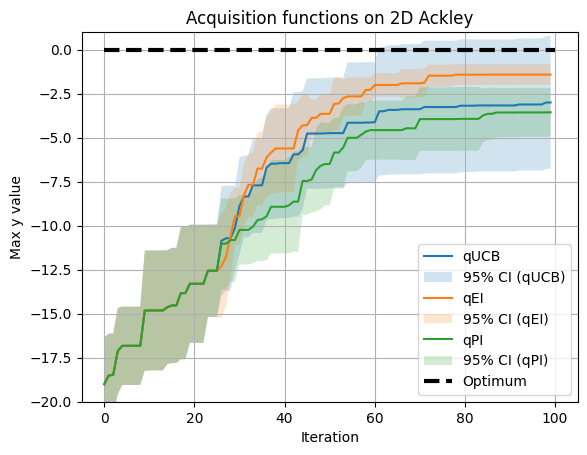

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ucb_2, label='qUCB')
plt.fill_between(np.arange(len(ucb_2)), ucb_2 - ucb_ci_2, ucb_2 + ucb_ci_2, alpha=0.2, label='95% CI (qUCB)')

# Dimension 3
plt.plot(ei_2, label='qEI')
plt.fill_between(np.arange(len(ei_2)), ei_2 - ei_ci_2, ei_2 + ei_ci_2, alpha=0.2, label='95% CI (qEI)')

# Dimension 4
plt.plot(pi_2, label='qPI')
plt.fill_between(np.arange(len(pi_2)), pi_2 - pi_ci_2, pi_2 + pi_ci_2, alpha=0.2, label='95% CI (qPI)')

plt.plot([0, 100], [0, 0], "k--", lw=3, label='Optimum')

plt.ylim([-20, 1]) 
plt.title('Acquisition functions on 2D Ackley')
plt.xlabel('Iteration')
plt.ylabel('Max y value')
plt.legend()
plt.grid(True)
plt.show()
